### Introduction to Classification Algorithms - Logistic Regression

Author: Richard Harry

Date Created: April 7, 2023

Last Modified: June 21, 2023

The goal of this notebook is to introduce you to using fundamental classification algorithms to group data and make predictions from the relationship classes.  It thus will cover some common techniques using logistic regression models to classify physics data.

[View this notebook on Google Colab.](https://colab.research.google.com/drive/1RGBks4Li-VMQS5JxRkSBqTc65uIi7gir#scrollTo=VwsXqRsa3VeV&uniqifier=3)

### Introduction to Logistic Regression

Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.


The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.


In logistic regression, you are performing linear regression, but applying a **sigmoid function** to determine the outcome.



**Sigmoid / Logistic Function**
$$P = \frac{1}{1+e^{-y}}$$


### Properties of Logistic Regression

The dependent variable follows a Bernoulli Distribution
Estimation is maximum likelihood estimation (MLE).

In Maximum Likelihood Estimation, a probability distribution for the target variable (class label) is assumed and then a likelihood function is defined that calculates the probability of observing the outcome given the input data and the model. This function can then be optimized to find the set of parameters that results in the largest sum likelihood over the training dataset.

### Advantages
* Straight forward, easy to implement, does not require high compute power, easy to interpret, used widely.

* Does not require feature scaling and provides a probability score for observations.
* Logistic regression is very fast at classifying unknown records
* It performs well when the dataset is linearly separable.

* It can interpret model coefficients as indicators of feature importance

### Disadvantages
* Not able to handle a large number of category features/variables.

* Vulnerable to overfitting.


##Binomial Logistic Regression##
In this notebook, we will utilize **binomial logistic regression** which is used for fundamental classification problems such as the one we will discuss.

A binomial logistic regression (or logistic regression for short) is used when the outcome variable being predicted is dichotomous (i.e. yes/no, pass/fail). This model can be used with any number of independent variables that are categorical or continuous.

For more information on binomial logistic regression, follow this [link](https://resources.nu.edu/statsresources/Binomiallogistic#:~:text=A%20binomial%20logistic%20regression%20(or,that%20are%20categorical%20or%20continuous.).


### Introduction to the Dataset

Refractive Index (Index of Refraction) is a value calculated from the ratio of the speed of light in a vacuum to that in a second medium of greater density. The refractive index variable is most commonly symbolized by the letter n or n' in descriptive text and mathematical equations.

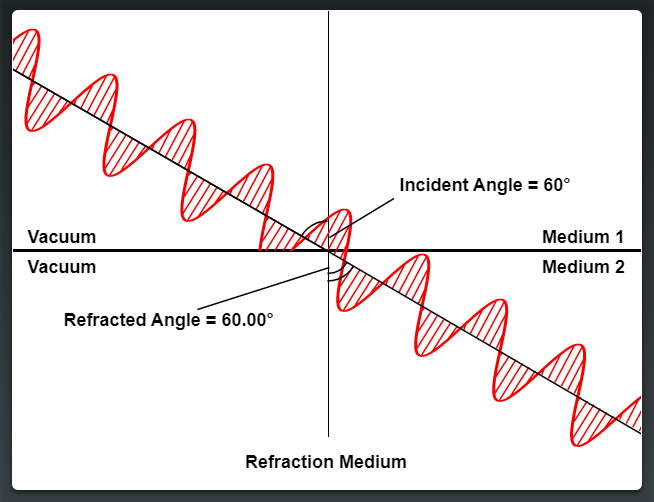

The formula of the refractive index is as follows:

$$ n = c/v$$

Where,

* n is the refractive index,

* c is the velocity of light in a vacuum ( 3 × 10^8 m/s),

* v is the velocity of light in a substance

The vacuum has a refractive index of 1. The refractive index of other materials can be calculated from the above equation. Higher the refractive index, the higher the optical density and slower is the speed of light. The table below lists the refractive index of different media.

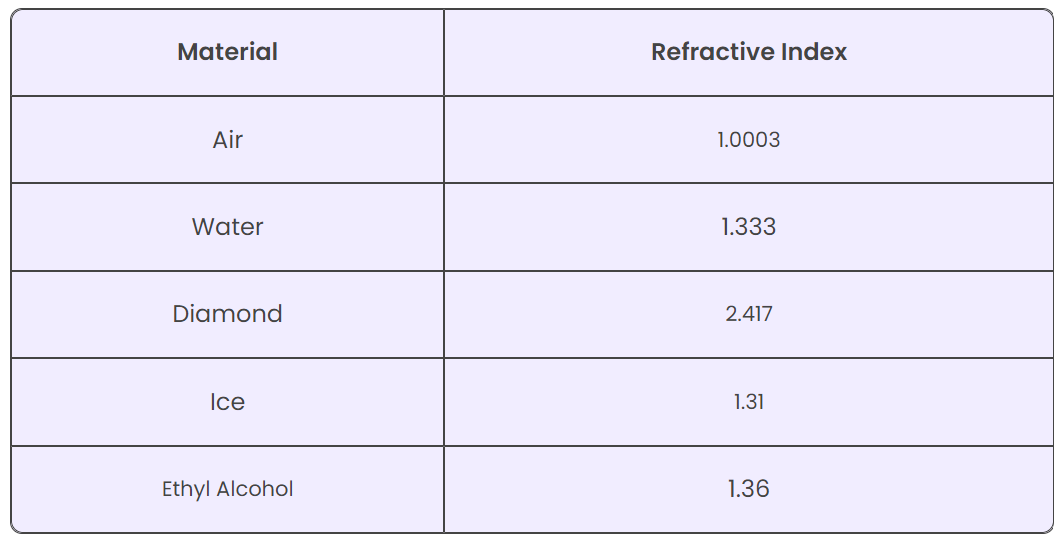

The data that we will be classifying in this module contains the extracted refractive index and corresponding wavelength from peer-reviewed publications. The dataset will be used to predict the transpency, translucency, or opaquness of the materials and from there we can determine the potential uses for these optical materials.

### Imports
First, we want to import our libraries, features, and settings for our classification algorithm

In [192]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns; sns.set()
from sklearn import preprocessing
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
import io
from google.colab import files


In [193]:
import csv

csv_rows = csv.reader(open("refractive_index.csv","r"))
result_array = []
for row_index, row in enumerate(csv_rows):
    if row_index != 0: #to neglect column names row
        result_array.append(row)
print(result_array)

[['2.07271', '', 'cyclohexanone'], ['2.05906', '', 'cyclohexanone'], ['2.0455', '', 'cyclohexanone'], ['2.032039', '', 'cyclohexanone'], ['2.018663', '', 'cyclohexanone'], ['2.005375', '', 'cyclohexanone'], ['1.8244', '', 'phosphorus'], ['2.6', '', 'phosphorus'], ['2.4', '', 'phosphorus'], ['2.198', '', 'BaTiO3'], ['2.217', '510', 'BaTiO3'], ['1.329', '510', 'MeOH'], ['1.361', '510', 'EtOH'], ['1.407', '510', 'THF'], ['1.422', '', 'Dioxane'], ['3.6', '', 'GaAs'], ['3.16', '', 'AlAs'], ['3.55', '', 'InP'], ['2.5', '', 'ZnSe'], ['2.72', '467', 'ZnTe'], ['2.7104', '172', 'SiC'], ['2.7104', '498', 'SiC'], ['2.6916', '185', 'SiC'], ['2.6916', '568', 'SiC'], ['2.66', '213', 'SiC'], ['2.66', '500', 'SiC'], ['2.29', '218', 'GaN'], ['2.29', '1000', 'GaN'], ['3.17', '315', 'GaP'], ['3.17', '344', 'GaP'], ['5.192', '66', 'GaP'], ['5.192', '1000', 'GaP'], ['3.347', '299', 'GaAs'], ['3.347', '1890', 'GaAs'], ['3.346', '565', 'GaAs'], ['3.346', '', 'GaAs'], ['1.46', '', 'PFA'], ['1.468', '', 'PFA'],

Next, let's upload the file containing the refractive index dataset.

In [194]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving refractive_index.csv to refractive_index (11).csv
User uploaded file "refractive_index.csv" with length 833895 bytes


**Exercise 0:** Once the `.csv` file has been uploaded, try printing a table header, displaying the data.

In [161]:
df = pd.read_csv(io.StringIO(uploaded['refractive_index.csv'].decode('utf-8')))
df = df[['raw_values', 'measurement_wavelength','compound']]

df.head()

,raw_values,measurement_wavelength,compound
0,2.07271,NaN,cyclohexanone
1,2.05906,NaN,cyclohexanone
2,2.0455,NaN,cyclohexanone
3,2.032039,NaN,cyclohexanone
4,2.018663,NaN,cyclohexanone


In [197]:
refractive_index = pd.read_csv("refractive_index.csv")

In [198]:
refractive_index

,raw_value,measurement_wavelength,compound
0,2.07271,NaN,cyclohexanone
1,2.05906,NaN,cyclohexanone
2,2.0455,NaN,cyclohexanone
3,2.032039,NaN,cyclohexanone
4,2.018663,NaN,cyclohexanone
...,...,...,...
49071,1.344,NaN,Acetonitrile
49072,1.4,NaN,Inositol
49073,1.3,NaN,Sucrose
49074,2.4,NaN,DMSO-d6


In [220]:
import csv

csv_rows = csv.reader(open("refractive_index.csv","r"))
result_array = []
for row_index, row in enumerate(csv_rows):
    if row_index != 0: #to neglect column names row
        result_array.append(row)
print(result_array)

[['2.07271', '', 'cyclohexanone'], ['2.05906', '', 'cyclohexanone'], ['2.0455', '', 'cyclohexanone'], ['2.032039', '', 'cyclohexanone'], ['2.018663', '', 'cyclohexanone'], ['2.005375', '', 'cyclohexanone'], ['1.8244', '', 'phosphorus'], ['2.6', '', 'phosphorus'], ['2.4', '', 'phosphorus'], ['2.198', '', 'BaTiO3'], ['2.217', '510', 'BaTiO3'], ['1.329', '510', 'MeOH'], ['1.361', '510', 'EtOH'], ['1.407', '510', 'THF'], ['1.422', '', 'Dioxane'], ['3.6', '', 'GaAs'], ['3.16', '', 'AlAs'], ['3.55', '', 'InP'], ['2.5', '', 'ZnSe'], ['2.72', '467', 'ZnTe'], ['2.7104', '172', 'SiC'], ['2.7104', '498', 'SiC'], ['2.6916', '185', 'SiC'], ['2.6916', '568', 'SiC'], ['2.66', '213', 'SiC'], ['2.66', '500', 'SiC'], ['2.29', '218', 'GaN'], ['2.29', '1000', 'GaN'], ['3.17', '315', 'GaP'], ['3.17', '344', 'GaP'], ['5.192', '66', 'GaP'], ['5.192', '1000', 'GaP'], ['3.347', '299', 'GaAs'], ['3.347', '1890', 'GaAs'], ['3.346', '565', 'GaAs'], ['3.346', '', 'GaAs'], ['1.46', '', 'PFA'], ['1.468', '', 'PFA'],

In [222]:
refractive_index.shape

(5765, 3)

In [223]:
type(refractive_index)

pandas.core.frame.DataFrame

In [224]:
refractive_index.head

<bound method NDFrame.head of       raw_value  measurement_wavelength      compound
10        2.217                   510.0        BaTiO3
11        1.329                   510.0          MeOH
12        1.361                   510.0          EtOH
13        1.407                   510.0           THF
19         2.72                   467.0          ZnTe
...         ...                     ...           ...
28850    1.6183                  4047.0  Ba2Mg(B3O6)2
28851    1.6113                  5876.0  Ba2Mg(B3O6)2
28852    1.5958                 10140.0  Ba2Mg(B3O6)2
28853    1.5866                 15296.0  Ba2Mg(B3O6)2
28854    1.5826                 23254.0  Ba2Mg(B3O6)2

[5765 rows x 3 columns]>

In [225]:
refractive_index.isnull().values.any()

False

In [226]:
len(refractive_index)

5765

In [227]:
refractive_index = refractive_index.dropna()

In [228]:
df.values[0]

array(['2.07271', nan, 'cyclohexanone'], dtype=object)

Given that this data was extracted from several studies on the refractive index on many of materials, but for the case of this classification problem, we will only be using the `raw_value` and `wavelength` variables since they are continuous variables.

Now, from the sklearn library, we'll import `train_test_split` which creates the dataframes for training and test datasets. The dataset that we initially feed into a classification algorithm to “train” the algorithm, is typically called the training dataset. The training dataset is used exclusively as an input to help the algorithm “learn.”

But typically, we also have a so-called “test” dataset. We use the test dataset as an input to the model after the model has been built to “test” that the model works as needed. So when we build a classification model, we usually need a training dataset and a test dataset.

In [229]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)
train_df = trainingSet
test_df = testSet

Next, we will clean any missing values in the dataset, if needed. `dropna` is used to drop/remove missing values from rows and columns, np. nan/pd. NaT (Null/None) are considered as missing values.

In [230]:

train_df = train_df.dropna()
test_df = test_df.dropna()

Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test

In [249]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,1].values
X_test = test_df.iloc[:,:-1].values
y_test = test_df.iloc[:,1].values
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

Now that we have our data split into training and test data, let's load our variables of interest from our table, which is the `measurement_wavelength` of light passing through the material, and the `raw_value` of the refractive index.

In [250]:
X_train = train_df["measurement_wavelength"]

y_train = train_df["raw_values"]

X_test = test_df[['measurement_wavelength']]

y_test = test_df["raw_values"]

**Exercise 1**: Let's test our y-variable in the training and test dataset to see if the data was loaded properly. If successful, the name and datatype should print below the values of the dataframe.

In [242]:
y_test.head()

10500    1.56747
13918       1.93
19241       1.62
999        1.986
6088         2.1
Name: raw_values, dtype: object

In [243]:
y_train.value_counts()

1.33      33
1.46      31
1.359     31
1.479     28
1.36      25
          ..
1.3455     1
1.205      1
1.3596     1
1.6207     1
1.4864     1
Name: raw_values, Length: 1913, dtype: int64

# Data Exploration

**Exercise 2:** Now let us try producing a count plot that visualizes the `raw_value` of the refractive indexes from the dataset

In [244]:
sns.countplot("raw_values", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

TypeError: ignored

In order to train our model accordingly, let's group the data together and extract the mean using the `groupby` function.

In [251]:
train_df.groupby('raw_values').mean()

<ipython-input-251-bdc3e95be990>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby('raw_values').mean()


,measurement_wavelength
raw_values,
1.0005,550.0
1.00137,435.0
1.003,565.0
1.012,428.0
1.014,4025.0
...,...
5.648,2952.0
5.8,248.0
5.81,512.0


In [252]:
train_df.groupby('measurement_wavelength').mean()

<ipython-input-252-eecc5efb5d64>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby('measurement_wavelength').mean()


""
measurement_wavelength
0.0
1.0
2.0
3.0
4.0
...
33414766.0
36501533.0
43583277.0


# Model Development and Prediction

Now that we have our dataset uploaded, trained, and split into classes, we can now apply python's `LogisticRegression` model using the `sklearn` library

In [254]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(x_test)

ValueError: ignored

**Exercise 3:**Let's see how our model performs on making predictions based on a confusion matrix. The output should display an array showing the dataframe and size.

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Now let's visualize our confusion matrix by importing our standard libraries such as `numpy`, `matplotlib`, and `seaborn`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Exercise 4:** Visualize the confusion matrix using a heatmap grid, which will seperate our arrays into classes based on the predicted refractive indices and our actual indices.

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC (Receiver Operation Characteristic) Curve

An ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC (Area under the ROC curve) represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. The gigher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the higher the AUC, the better the model is at distinguishing between transparent and non-transparent materials



**Exercise 5:** To validate the performance of our classification model with the index data, let's measure the ROC based on the `tpr` and `fpr`. The TPR defines how many correct positive results occur among all positive samples available during the test. FPR, on the other hand, defines how many incorrect positive results occur among all negative samples available during the test.

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()